In [3]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import spacy
import umap

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

In [2]:
!pip install sentence-transformers
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('Dataset\CRISISTWEET.csv')
df=df.drop(columns=['Unnamed: 0'])
df

,tweet,label
0,Sandy be soooo mad that she be shattering our ...,2012_Sandy_Hurricane
1,Neighborly duties. @Cory_Kennedy arrives to th...,2012_Sandy_Hurricane
2,I don't know how I'm getting back to Jersey si...,2012_Sandy_Hurricane
3,Already flooded so much #SANDY @ Hoboken http:...,2012_Sandy_Hurricane
4,"On that note, i pray that everyone stays safe,...",2012_Sandy_Hurricane
...,...,...
32457,@danshirley Fertilizer plant explosion late la...,2013_West_Texas_Explosion
32458,Ok I'm NOT going to put up with people compari...,2013_West_Texas_Explosion
32459,RT @BGEA: A chaplain just prayed w/man who was...,2013_West_Texas_Explosion
32460,US: Stil no confirmed deaths from fertilizer p...,2013_West_Texas_Explosion


In [30]:
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    
    # List of words to remove
    custom_stopwords = {"pt","de","mr","g","ft","ya","al","ne","dr","hr","v","co","e","au","nw","sw","c","le","ef","fo","se","ll","p","ur","da","nj","ab","bc","nd","mp","yr","rd","ra","f","ny","na","pa","x","b","ht","n","r","h","k","rt","not","m","u","new","go","like","tx","ok","let","s","pm","ve","w","th","st","oh","d","ap","be","mt"}  # Replace with your actual words
    # custom_stopwords = {}
    # Process the text with spaCy
    doc = nlp(text.lower())
    
    # Filter out stopwords, punctuation, and custom words, and lemmatize tokens
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha and token.lemma_ not in custom_stopwords]
    
    # Reconstruct the cleaned text
    return ' '.join(tokens)


In [ ]:
import os

os.environ["HF_TOKEN"] = "your-hugging-face-token"

In [7]:
model1 = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2',device=0)
model2 = SentenceTransformer('sentence-transformers/sentence-t5-base',device=0)
model3 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2',device=0)
model4 = SentenceTransformer('sentence-transformers/LaBSE',device=0)
model5 = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2',device=0)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/219M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

In [8]:
embeddings1 = model1.encode(df['tweet'].tolist())
embeddings2 = model2.encode(df['tweet'].tolist())
embeddings3 = model3.encode(df['tweet'].tolist())
embeddings4 = model4.encode(df['tweet'].tolist())
embeddings5 = model5.encode(df['tweet'].tolist())

Batches:   0%|          | 0/1015 [00:00<?, ?it/s]

Batches:   0%|          | 0/1015 [00:00<?, ?it/s]

Batches:   0%|          | 0/1015 [00:00<?, ?it/s]

Batches:   0%|          | 0/1015 [00:00<?, ?it/s]

Batches:   0%|          | 0/1015 [00:00<?, ?it/s]

In [6]:
import umap

In [9]:

umap_reducer = umap.UMAP(n_components=30, random_state=42)
reduced_embeddings1 = umap_reducer.fit_transform(embeddings1)
reduced_embeddings2 = umap_reducer.fit_transform(embeddings2)
reduced_embeddings3 = umap_reducer.fit_transform(embeddings3)
reduced_embeddings4 = umap_reducer.fit_transform(embeddings4)
reduced_embeddings5 = umap_reducer.fit_transform(embeddings5)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [10]:
df

,tweet,label
0,Sandy be soooo mad that she be shattering our ...,2012_Sandy_Hurricane
1,Neighborly duties. @Cory_Kennedy arrives to th...,2012_Sandy_Hurricane
2,I don't know how I'm getting back to Jersey si...,2012_Sandy_Hurricane
3,Already flooded so much #SANDY @ Hoboken http:...,2012_Sandy_Hurricane
4,"On that note, i pray that everyone stays safe,...",2012_Sandy_Hurricane
...,...,...
32457,@danshirley Fertilizer plant explosion late la...,2013_West_Texas_Explosion
32458,Ok I'm NOT going to put up with people compari...,2013_West_Texas_Explosion
32459,RT @BGEA: A chaplain just prayed w/man who was...,2013_West_Texas_Explosion
32460,US: Stil no confirmed deaths from fertilizer p...,2013_West_Texas_Explosion


In [11]:
from sklearn.cluster import KMeans

In [12]:
num_tweets = len(df)
k=6
kmeans_llm1 = KMeans(n_clusters=k,random_state=42).fit(reduced_embeddings1)
kmeans_llm2 = KMeans(n_clusters=k,random_state=42).fit(reduced_embeddings2)
kmeans_llm3 = KMeans(n_clusters=k,random_state=42).fit(reduced_embeddings3)
kmeans_llm4 = KMeans(n_clusters=k,random_state=42).fit(reduced_embeddings4)
kmeans_llm5 = KMeans(n_clusters=k,random_state=42).fit(reduced_embeddings5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [17]:
labels_llm1 = kmeans_llm1.labels_
labels_llm2 = kmeans_llm2.labels_
labels_llm3 = kmeans_llm3.labels_
labels_llm4 = kmeans_llm4.labels_
labels_llm5 = kmeans_llm5.labels_

In [19]:
def expand_labels(labels):
    return (labels[:, None] == labels[None, :]).astype(int)

In [20]:
co_association = (
    expand_labels(labels_llm1) + 
    expand_labels(labels_llm2) + 
    expand_labels(labels_llm3) +
    expand_labels(labels_llm4) +
    expand_labels(labels_llm5)
) / 5

In [21]:
kmeans_consensus = KMeans(n_clusters=k, random_state=42)
consensus_labels = kmeans_consensus.fit_predict(co_association)
df['consensus_label'] = consensus_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


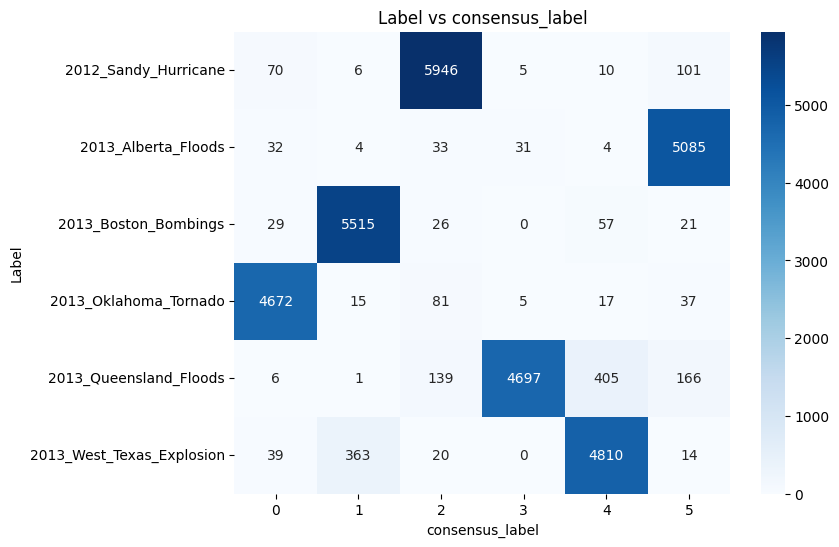

In [23]:
crosstab_matrix = pd.crosstab(df['label'], df['consensus_label'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=crosstab_matrix.columns, yticklabels=crosstab_matrix.index)
plt.xlabel("consensus_label")
plt.ylabel("Label")
plt.title("Label vs consensus_label")
plt.show()

In [24]:
# Define the mapping (example mapping, adjust based on your data)
label_to_consensus = {
    '2013_Oklahoma_Tornado':0,
    '2013_Boston_Bombings':1,
    '2012_Sandy_Hurricane':2,
    '2013_Queensland_Floods':3,
    '2013_West_Texas_Explosion':4,
    '2013_Alberta_Floods' :5
}

# Map 'label' column to corresponding string values
df['label_mapped'] = df['label'].map(label_to_consensus)

accuracy = sum(df['label_mapped'].values == df['consensus_label'].values) / len(df['label'])
print(accuracy)

0.9464912821144723


In [25]:
crosstab_matrix

consensus_label,0,1,2,3,4,5
label,,,,,,
2012_Sandy_Hurricane,70,6,5946,5,10,101
2013_Alberta_Floods,32,4,33,31,4,5085
2013_Boston_Bombings,29,5515,26,0,57,21
2013_Oklahoma_Tornado,4672,15,81,5,17,37
2013_Queensland_Floods,6,1,139,4697,405,166
2013_West_Texas_Explosion,39,363,20,0,4810,14


In [22]:
!pip install torch torch-geometric pandas scikit-learn networkx

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.6 MB/s eta 0:00:00


In [31]:
df['tweet']=df['tweet'].apply(preprocess_text)

In [17]:
df.to_csv("concensus_label.csv")

In [18]:
import pandas as pd

In [32]:
# df=pd.read_csv("/kaggle/input/concensus-label/concensus_label.csv")
df['tweet']=df['tweet'].astype(str)

In [33]:
import torch
torch.cuda.empty_cache()

In [34]:
topics=dict()

In [35]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, GCNConv
from torch_geometric.nn import BatchNorm


class KeywordGNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Improved GNN model with attention and multi-layer architecture.
        
        Args:
            input_dim (int): Dimension of input node features.
            hidden_dim (int): Dimension of hidden layers.
            output_dim (int): Dimension of output (1 for ranking scores).
        """
        super().__init__()
        # First Graph Attention Layer
        self.conv1 = GATConv(input_dim, hidden_dim, heads=4, dropout=0.3, concat=True)
        # Batch Normalization for Stable Training
        self.bn1 = BatchNorm(hidden_dim * 4)  # Adjust for concatenation
        # Second GAT Layer
        self.conv2 = GATConv(hidden_dim * 4, hidden_dim, heads=1, dropout=0.3, concat=False)
        # Batch Normalization
        self.bn2 = BatchNorm(hidden_dim)
        # Final Layer to Compute Scores
        self.conv3 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index, edge_weight=None):
        """
        Forward pass for GNN.

        Args:
            x (Tensor): Node features [num_nodes, input_dim].
            edge_index (Tensor): Edge list [2, num_edges].
            edge_weight (Tensor): Edge weights [num_edges].

        Returns:
            Tensor: Output scores for each node.
        """
        # First Layer
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(self.bn1(x))
        x = F.dropout(x, p=0.3, training=self.training)

        # Second Layer
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(self.bn2(x))
        x = F.dropout(x, p=0.3, training=self.training)

        # Final Layer
        x = self.conv3(x, edge_index, edge_weight)
        return x


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

class TopicKeywordGNN:
    def __init__(self, tweets_df, text_column='tweet', label_column='label', num_keywords=10):
        self.tweets_df = tweets_df
        self.text_column = text_column
        self.label_column = label_column
        self.num_keywords = num_keywords
        self.model = None
        self.optimizer = None
        self.loss_function = None
        self.first_group_saved = False

    def _preprocess(self, text_data, label=None):
        self.vectorizer = CountVectorizer(
            max_features=1000,
            ngram_range=(1, 1)
        )
        count_matrix = self.vectorizer.fit_transform(text_data)
        self.feature_names = self.vectorizer.get_feature_names_out()
        self.feature_matrix = count_matrix.toarray()

        # Save for first group
        if not self.first_group_saved and label is not None:
            os.makedirs("output", exist_ok=True)
            np.save(f"output/freq_matrix_{label}.npy", self.feature_matrix)
            pd.Series(self.feature_names).to_csv(f"output/feature_names_{label}.csv", index=False)
            self.first_group_saved = True

    def build_keyword_graph(self, label=None):
        G = nx.Graph()
        feature_to_index = {feature: idx for idx, feature in enumerate(self.feature_names)}

        for idx, feature in enumerate(self.feature_names):
            G.add_node(idx, feature=feature)

        for doc in self.feature_matrix:
            active_features = [self.feature_names[i] for i in np.where(doc > 0)[0]]  # just presence, no threshold
            for i in range(len(active_features)):
                for j in range(i + 1, len(active_features)):
                    node_i = feature_to_index[active_features[i]]
                    node_j = feature_to_index[active_features[j]]

                    if G.has_edge(node_i, node_j):
                        G[node_i][node_j]['weight'] += 1
                    else:
                        G.add_edge(node_i, node_j, weight=1)

        if label is not None and not hasattr(self, 'first_graph_saved'):
            nx.write_gml(G, f"output/keyword_graph_{label}.gml")
            self.first_graph_saved = True

        edge_index = torch.tensor(list(G.edges)).t().contiguous()
        edge_weight = torch.tensor([G[u][v]['weight'] for u, v in G.edges], dtype=torch.float)
        node_features = torch.eye(len(self.feature_names))
        return Data(x=node_features, edge_index=edge_index, edge_attr=edge_weight)

    def extract_topic_keywords(self, text_data, label=None, epochs=10):
        self._preprocess(text_data, label=label)
        graph_data = self.build_keyword_graph(label=label)

        input_dim = graph_data.x.shape[1]
        self.model = KeywordGNN(input_dim=input_dim, hidden_dim=64, output_dim=1)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.loss_function = torch.nn.MSELoss()

        for epoch in range(epochs):
            self.model.train()
            self.optimizer.zero_grad()
            outputs = self.model(graph_data.x, graph_data.edge_index, graph_data.edge_attr)
            target = torch.ones_like(outputs)
            loss = self.loss_function(outputs.squeeze(), target.squeeze())
            loss.backward()
            self.optimizer.step()
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

        self.model.eval()
        with torch.no_grad():
            outputs = self.model(graph_data.x, graph_data.edge_index, graph_data.edge_attr)

        keyword_scores = outputs.squeeze().numpy()
        top_keyword_indices = keyword_scores.argsort()[-self.num_keywords:][::-1]
        return [self.feature_names[i] for i in top_keyword_indices]

    def extract_keywords_by_label(self):
        label_groups = self.tweets_df.groupby(self.label_column)
        keywords_by_label = {}

        for label, group in label_groups:
            print(f"Processing label: {label}")
            top_keywords = self.extract_topic_keywords(group[self.text_column].tolist(), label=label, epochs=50)
            keywords_by_label[label] = top_keywords

        return keywords_by_label


In [48]:
def main():
    # Assuming `df` is your DataFrame with columns 'tweet' and 'Cluster'
    extractor = TopicKeywordGNN(df, text_column='tweet', label_column='consensus_label')
    keywords_by_label = extractor.extract_keywords_by_label()

    for label, keywords in keywords_by_label.items():
        print(f"Label {label}: {keywords}")
        topics[label]=keywords

if __name__ == "__main__":
    main()


Processing label: 0
Epoch 1/50, Loss: 1.696201205253601
Epoch 2/50, Loss: 2.603499174118042
Epoch 3/50, Loss: 3.9985926151275635
Epoch 4/50, Loss: 7.973708629608154
Epoch 5/50, Loss: 8.476630210876465
Epoch 6/50, Loss: 3.083967685699463
Epoch 7/50, Loss: 6.0784430503845215
Epoch 8/50, Loss: 3.206448793411255
Epoch 9/50, Loss: 1.4984854459762573
Epoch 10/50, Loss: 1.1725051403045654
Epoch 11/50, Loss: 2.7594010829925537
Epoch 12/50, Loss: 1.1045558452606201
Epoch 13/50, Loss: 2.9256527423858643
Epoch 14/50, Loss: 1.5534298419952393
Epoch 15/50, Loss: 3.0700199604034424
Epoch 16/50, Loss: 1.5296862125396729
Epoch 17/50, Loss: 4.994450092315674
Epoch 18/50, Loss: 4.411035060882568
Epoch 19/50, Loss: 1.7662934064865112
Epoch 20/50, Loss: 1.4933665990829468
Epoch 21/50, Loss: 1.922173023223877
Epoch 22/50, Loss: 1.341864824295044
Epoch 23/50, Loss: 1.7919635772705078
Epoch 24/50, Loss: 0.8629856705665588
Epoch 25/50, Loss: 1.3490029573440552
Epoch 26/50, Loss: 1.3585045337677002
Epoch 27/50

In [42]:
from sklearn.metrics import precision_score, accuracy_score, f1_score

# Mapping from numerical topic labels to string labels
topic_label_mapping = {
    2: '2012_Sandy_Hurricane', 
    1: '2013_Boston_Bombings',
    4: '2013_West_Texas_Explosion',
    3: '2013_Queensland_Floods',
    5: '2013_Alberta_Floods',
    0: '2013_Oklahoma_Tornado'
}

# Reverse mapping for string to numerical topic if needed for evaluation
string_to_topic_mapping = {v: k for k, v in topic_label_mapping.items()}

# # Map assigned topic numbers to string labels
# df['assigned_topic_label'] = df['assigned_topic'].map(topic_label_mapping)

# Map true labels to their numerical topic
df['true_topic_label'] = df['label'].map(string_to_topic_mapping)

# Calculate Accuracy
accuracy = accuracy_score(df['true_topic_label'], df['consensus_label'])
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision (weighted for multiclass classification)
precision = precision_score(df['true_topic_label'], df['consensus_label'], average='weighted')
print(f"Precision: {precision:.4f}")

# Calculate F1 Score (weighted for multiclass classification)
f1 = f1_score(df['true_topic_label'], df['consensus_label'], average='weighted')
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9465
Precision: 0.9476
F1 Score: 0.9462
